In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import hdbscan

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [2]:
df = pd.read_pickle('../../../data/processed/state0/right_android_df.pkl')
print(df.shape)

(153, 7)


In [3]:
df.columns

Index(['eventDurationSeconds', 'eventStartSpeed', 'eventEndSpeed',
       'gpsMedianLateralAccel', 'bearing_angular_change_per_second',
       'bearingAngleChange', 'gps_radius'],
      dtype='object')

In [4]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(df)

In [5]:
clusterer = hdbscan.HDBSCAN()

In [6]:
clusterer.fit(df)

/Users/connieyang/Documents/GitHub/ARITY-BTT-PROJECT-1/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/connieyang/Documents/GitHub/ARITY-BTT-PROJECT-1/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,min_cluster_size,5
,min_samples,None
,cluster_selection_epsilon,0.0
,max_cluster_size,0
,metric,'euclidean'
,alpha,1.0
,p,None
,algorithm,'best'
,leaf_size,40
,memory,Memory(location=None)
,approx_min_span_tree,True


In [7]:
clusterer.labels_

array([ 2,  2,  2, -1, -1,  2,  2,  2, -1,  2, -1,  1, -1,  2, -1,  2,  2,
        2,  2,  1,  2,  2,  2,  2,  2, -1,  2,  2, -1,  2, -1,  2,  2,  2,
        2,  2,  2,  1,  2, -1,  2,  2,  2,  2,  1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  1,  2, -1,  2,  2,  2, -1,
       -1,  2,  2,  1, -1,  2,  2,  2, -1,  2,  2,  2, -1,  2, -1,  2, -1,
       -1,  2,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  1,  2,  2,
        2,  2,  2,  2,  2,  2, -1, -1, -1,  2,  0,  0,  2,  2,  2,  0, -1,
        1,  2,  2, -1,  1,  2,  2,  2,  2,  2,  2,  2, -1,  2,  0,  2,  2,
        0,  2, -1,  2,  2,  2,  1,  2,  0,  0,  2,  2, -1,  2,  2,  1,  2])

In [8]:
clusterer.labels_.max()

np.int64(2)

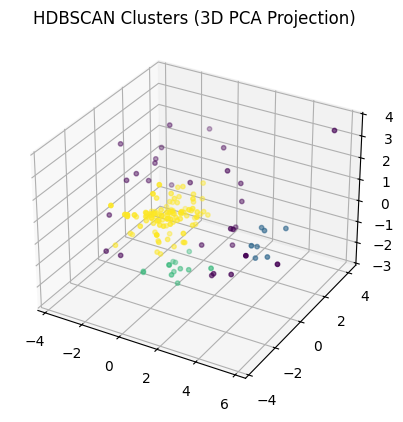

In [9]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusterer.labels_, s=10)
plt.title("HDBSCAN Clusters (3D PCA Projection)")
plt.show()

In [10]:
df['cluster']   = clusterer.labels_
df.head()

,eventDurationSeconds,eventStartSpeed,eventEndSpeed,gpsMedianLateralAccel,bearing_angular_change_per_second,bearingAngleChange,gps_radius,cluster
4,5.990321,2.729067,20.937756,0.266539,11.501888,74.401410,12.708904,2
5,3.983969,10.106580,16.496264,1.670492,20.080564,87.444240,15.692536,2
13,1.983875,6.352909,5.771305,0.783143,28.328398,72.000000,10.298458,2
14,0.952188,2.796175,7.314794,1.022221,34.972107,39.899998,8.238687,-1
17,1.984344,9.954382,15.367777,0.887267,7.256807,88.801390,43.543617,-1


In [11]:
df.groupby('cluster').mean()

,eventDurationSeconds,eventStartSpeed,eventEndSpeed,gpsMedianLateralAccel,bearing_angular_change_per_second,bearingAngleChange,gps_radius
cluster,,,,,,,
-1,4.958444,13.207359,12.379435,1.075431,16.786957,110.104113,30.811729
0,5.101606,20.919613,22.599018,1.256417,7.963728,47.611420,74.630569
1,1.960268,9.622270,9.078369,0.833589,11.710594,32.032339,21.043398
2,3.871614,9.053593,12.697999,1.433687,19.022436,87.293539,16.086363


cluster
-1    0.000000
 0    0.993587
 1    0.881107
 2    0.929722
Name: probability, dtype: float64


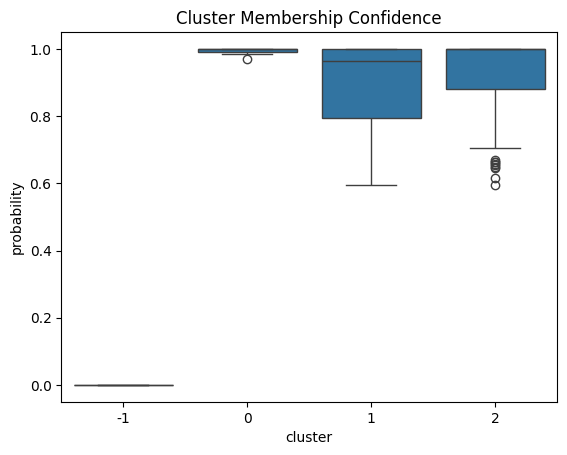

In [12]:
df['probability'] = clusterer.probabilities_
print(df.groupby('cluster')['probability'].mean())

sns.boxplot(x='cluster', y='probability', data=df)
plt.title("Cluster Membership Confidence")
plt.show()


In [13]:
df['cluster'].value_counts()

cluster
 2    104
-1     29
 1     13
 0      7
Name: count, dtype: int64

In [14]:
mask = clusterer.labels_ != -1
score = silhouette_score(X_scaled[mask], clusterer.labels_[mask])
print("Silhouette Score (excluding noise):", score)


Silhouette Score (excluding noise): 0.2759092066041683
